In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [72]:
np.random.seed(42)
weights = np.random.uniform(50,100,1000)

In [73]:
# CDF Example (Random Dataset)
# Plotting the cumulative histogram
plt.figure(figsize=(12,6))
plt.hist(weights, bins=np.arange(50,101,2), color='lightgray', edgecolor='black', alpha = 0.7, label='Overall Distribution', cumulative=True, density=True)

# Plotting the CDF (cumulative KDE)
sns.kdeplot(weights, cumulative=True, bw_method=0.5, fill=True, color='skyblue', alpha=0.7, linewidth=2, label='CDF (0 to 1)')



SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (832892393.py, line 7)

In [14]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [97]:
import empiricaldist
from statadict import parse_stata_dict

In [98]:
#the general social survey (GSS) the GSS surveys a representative sample of adult residents of the U.s. and asks que

dict_file='GSS.dct'
data_file="GSS.dat.gz"


In [99]:
from statadict import parse_stata_dict
stata_dict=parse_stata_dict(dict_file)


In [100]:
import gzip

In [101]:
fp=gzip.open(data_file)

In [102]:
#convert the file into a pandas dataframe 
import pandas as pd
gss=pd.read_fwf(fp,names=stata_dict.names,colspecs=stata_dict.colspecs)
print(gss.shape)
print(gss.head)

(64814, 8)
<bound method NDFrame.head of        YEAR   ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0      1972     1   23    16       2       1      0  18951.0
1      1972     2   70    10       1       1      0  24366.0
2      1972     3   48    12       2       1      0  24366.0
3      1972     4   27    17       2       1      0  30458.0
4      1972     5   61    12       2       1      0  50763.0
...     ...   ...  ...   ...     ...     ...    ...      ...
64809  2018  2344   37    12       2       2      0      0.0
64810  2018  2345   75    12       2       2      0  14755.0
64811  2018  2346   67    12       2       1      1  45400.0
64812  2018  2347   72    16       1       0      2  24970.0
64813  2018  2348   79    12       2       1      0      0.0

[64814 rows x 8 columns]>


In [103]:
#distribution of education
print(gss['EDUC'].value_counts().sort_index())



EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [104]:
#values 98 and99 are special codes for "dont know" and 'no answer' we will use replace  to replace these codes with NaN
import numpy as np
educ=gss['EDUC'].replace([98,99],np.nan)

In [105]:
educ

0        16.0
1        10.0
2        12.0
3        17.0
4        12.0
         ... 
64809    12.0
64810    12.0
64811    12.0
64812    16.0
64813    12.0
Name: EDUC, Length: 64814, dtype: float64

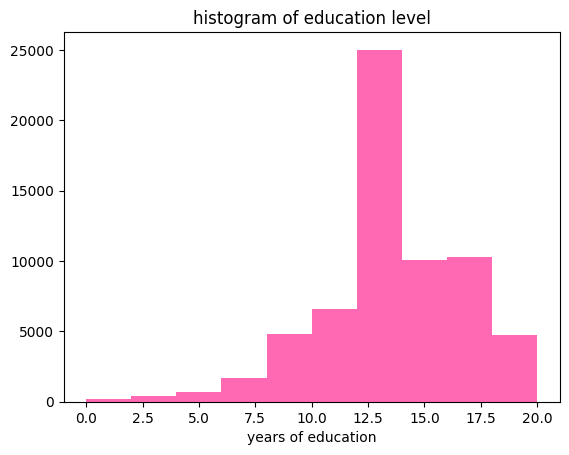

In [106]:
educ.hist(grid=False,color='hotpink')   #plt.hist(educ)
plt.xlabel('years of education')
plt.title('histogram of education level')
plt.show()

In [107]:
from empiricaldist import Pmf
pmf_educ=Pmf.from_seq(educ,normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())


<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64


In [108]:
#in this data set there are 165 respondents who report that they have had no formal education and 47 who have only one year here the last few rows 
print(pmf_educ.tail())

EDUC
18.0    2384
19.0     920
20.0    1439
Name: count, dtype: int64


In [109]:
pmf_educ_norm=Pmf.from_seq(educ,normalize=True)  #shows probability normalize =True
print(pmf_educ_norm.head())
print(pmf_educ_norm[12])  #sample for 12 years of experience

EDUC
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: proportion, dtype: float64
0.30420656899299164


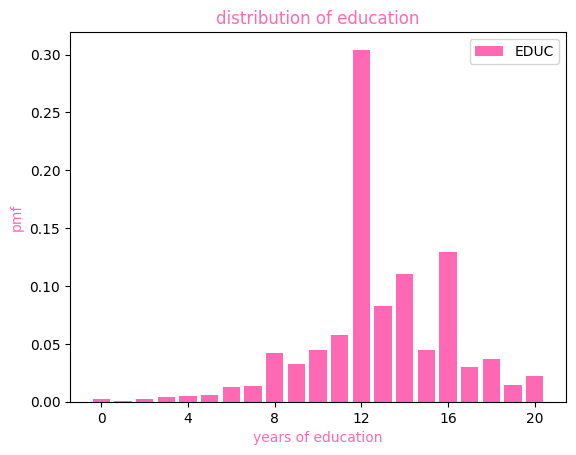

In [110]:
#pmf provedes a bar method that plots the values and their probabilities as a bar chart.
pmf_educ_norm.bar(label='EDUC',color='hotpink')
plt.xlabel('years of education',color='hotpink')
plt.xticks(range(0,21,4))
plt.ylabel('pmf',color='hotpink')
plt.title('distribution of education',color='hotpink')
plt.legend()
plt.show()

In [111]:
# Now CDF
from empiricaldist import Cdf


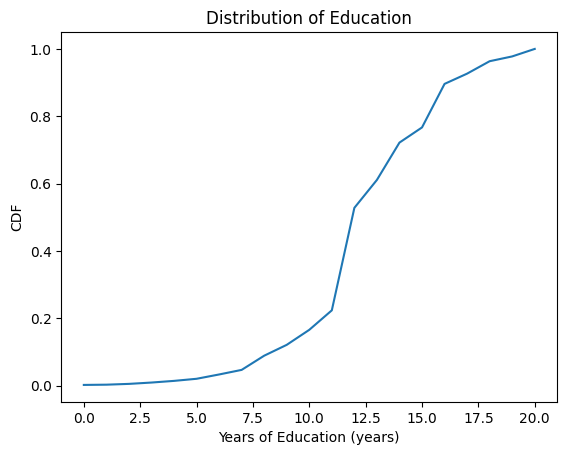

In [112]:
educ = gss['EDUC'].replace([98,99], np.nan)
cdf_educ = Cdf.from_seq(educ)

cdf_educ.plot()

plt.xlabel('Years of Education (years)')
plt.ylabel('CDF')
plt.title('Distribution of Education');
plt.show()

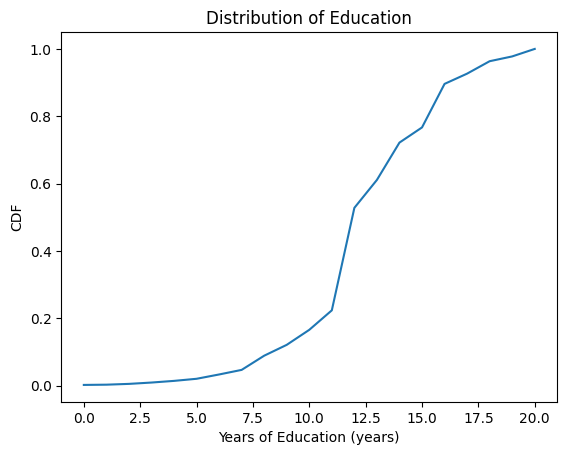

In [113]:
educ = gss['EDUC'].replace([98,99], np.nan)
cdf_educ = Cdf.from_seq(educ)

cdf_educ.plot()

plt.xlabel('Years of Education (years)')
plt.ylabel('CDF')
plt.title('Distribution of Education');
plt.show()

In [114]:
age = gss['AGE'].replace([98,99], np.nan)
cdf_a--+ge = Cdf.from_seq(age)


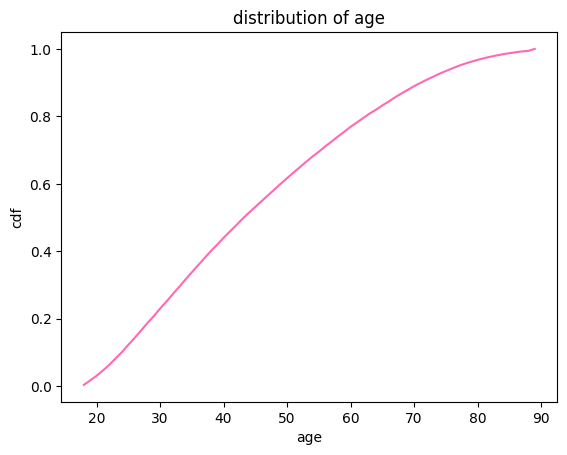

In [117]:

cdf_age.plot(color='hotpink')
plt.xlabel('age')
plt.ylabel('cdf')
plt.title('distribution of age')
plt.show()

In [118]:
q=51
p=cdf_age(q)
print(p)

0.6331867587402843


In [ ]:
#annotate Q! and Q3 on the plot to see  IQR and outliers 
print(f"Q1: {q1},Q2:{q2},Q3:{q3} ")

In [119]:
#create the cdf using empirical dist
cdf_age=empiricaldist.Cdf.frim_seq(age)
#extract cdf values and data points
cdf_values=cdf_age.values
data_points=cdf_age.index
plt.plot(data_points,cdf_values)
#add Q1 and Q3 lines with annotations
plt.axvline(x=q1,color='magenta',linestyle='--',label='Q1')
plt.axvline(x=q3,color='orange',linestyle='--',label='Q3')
plt.xlabel("age (years)")
plt.ylabel('CDf')
plt.title("distribution of age with Q1 and Q3 marked")

AttributeError: type object 'Cdf' has no attribute 'frim_seq'

In [120]:
male=(gss['GENDER']==1)
female=(gss['GENDER']==2)


In [121]:
#select age
male_age=age[male]
female_age=age[female]


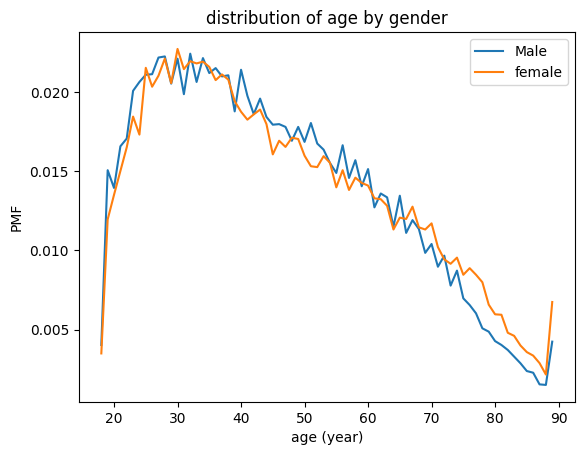

In [122]:
#plot Pmf for each
plt.
pmf_male_age=Pmf.from_seq(male_age)
pmf_male_age.plot(label="Male")
pmf_female_age=Pmf.from_seq(female_age)
pmf_female_age.plot(label='female')
plt.xlabel("age (year)")
plt.ylabel("PMF")
plt.title("distribution of age by gender")
plt.legend()
plt.show()

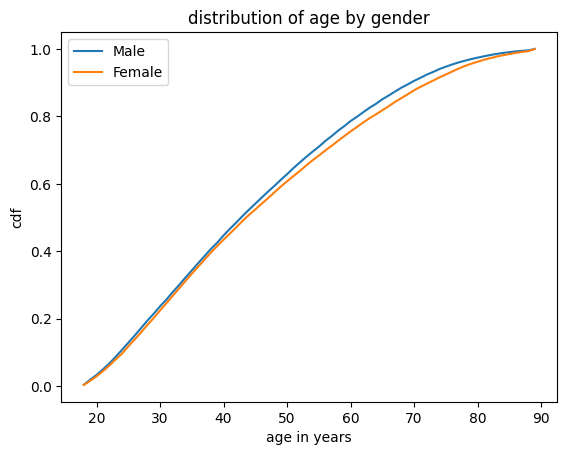

In [127]:
#now cdf for same data 
cdf_male_age=Cdf.from_seq(male_age)
cdf_male_age.plot(label='Male')

cdf_female_age=Cdf.from_seq(female_age)
cdf_female_age.plot(label='Female')

plt.xlabel("age in years")
plt.ylabel('cdf')
plt.title("distribution of age by gender")
plt.legend()
plt.show()

In [128]:
#observations:
#in geneeral cdfs are smother than pms because they smooth out randomness we can often get a better view of real differences between distributions in this case the lines are close together until age 40 after that the cdf is higher of men than women so what dies that men ?
#one way to interpret the difference is that the fraction of men below a given age is general more than the fraction of women below the same age for example about 79% of men are 60 of less compared to 76% of women

print(cdf_male_age(60),cdf_female_age(60))

0.785999579566954 0.7552990789035623


In [129]:
#comparig male and female at the 50th percentile
print(cdf_male_age.inverse(0.5),cdf_female_age.inverse(0.5))

43.0 44.0


In [130]:
#kernel density estimation of PDF
age_data=gss['AGE']

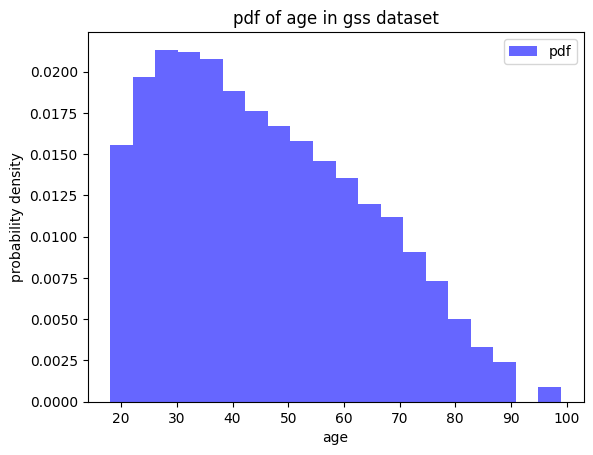

In [131]:
#create a histogram to visualixe the pdf
plt.hist(age_data,bins=20,density=True,alpha=0.6,color='b',label='pdf')
plt.xlabel("age")
plt.ylabel('probability density')
plt.title("pdf of age in gss dataset")
plt.legend()
plt.show()